# 📈 Random Forest Classifier

This notebook provides a thorough analysis of the Random Forest classifier, employing it to address our music genre classification challenge.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, label_binarize
from sklearn import metrics 
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We start by loading the stratified data that has been split into the train and test splits respectively.

In [ ]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1:]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1:]
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,15wos7ChIkysPIrX31hwwa,https://p.scdn.co/mp3-preview/6ee63d690b1d66aa...,1,0.570390,0.609811,0.889349,0.077387,0.033733,0.000466,0.142857,...,0,0,2,1,0,2,1,0,0,4
1,7csz4sW8pAL4M378czLtlD,https://p.scdn.co/mp3-preview/b3a469eb989d29b9...,0,0.464640,0.969831,0.951197,0.163211,0.000232,0.000000,0.252492,...,0,0,0,0,2,0,0,2,0,3
2,3EG9FJ0ToLfgnc1IG2Z1wz,https://p.scdn.co/mp3-preview/d82ed534bd9772e1...,1,0.445913,0.653054,0.902531,0.118129,0.334336,0.000325,0.878738,...,0,0,1,1,0,0,1,0,0,5
3,0f37VQs969vZUL4gVfHRV9,https://p.scdn.co/mp3-preview/ab5bc6e257c6a5a4...,1,0.537343,0.941673,0.889847,0.356316,0.001725,0.000245,0.146179,...,0,0,0,0,1,0,0,0,0,3
4,42ZVk59gT4tMlrZmd8Ijxf,https://p.scdn.co/mp3-preview/ce96eec80fbfd784...,1,0.402952,0.968825,0.911015,0.120781,0.000208,0.126919,0.581395,...,0,0,0,0,3,0,1,1,0,3


Shows the features (columns) that are part of our dataset.

In [ ]:
df_train.columns

Index(['id', 'preview_url', 'mode', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       ...
       'artist_genre_country', 'artist_genre_dance', 'artist_genre_hip',
       'artist_genre_hop', 'artist_genre_metal', 'artist_genre_pop',
       'artist_genre_rap', 'artist_genre_rock', 'artist_genre_trap', 'genre'],
      dtype='object', length=110)

### 🧱 Developing the Model

Feature selection for the random forest classifier, using SelectFromModel().

In [ ]:
forest = RandomForestClassifier()
params = { 
            'n_estimators': [100,150, 200, 250],
            'max_features': ['auto','log2'],
            'max_depth' : [5,6,7,8,9],
            'min_samples_split' :[0.01, 0.05, 0.1],
        }
        
# Select features
sel = SelectFromModel(forest)
X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:355: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
Selected Features Length: 33
Selected Features: danceability, energy, loudness, speechiness, acousticness, mfcc_1Mean, mfcc_2Mean, mfcc_3Mean, mfcc_3Std, mfcc_4Std, mfcc_5Std, mfcc_6Std, mfcc_7Std, mfcc_8Mean, mfcc_8Std, mfcc_9Std, mfcc_10Std, mfcc_11Std, zero_cross_Mean, spect_centroid_Mean, spect_centroid_Std, spect_contrast_Mean, spect_bw_Mean, spect_rolloff_Mean, spect_rolloff_Std, artist_genre_classical, artist_genre_contemporary, artist_genre_country, artist_genre_hip, artist_genre_hop, artist_genre_metal, artist_genre_pop, artist_genre_rap


Call GridSearch CV to determine the best hyperparameters for the model

In [ ]:
# Grid Search CV
rf_gridcv = GridSearchCV(estimator = forest, param_grid = params, cv = 5, n_jobs = -1)
# Fit the GridSearchCV model
rf_gridcv.fit(X_train_selected, y_train)

In [ ]:
# Best parameters based on GridSearchCV
rf_gridcv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 150}

### 📝 Model Evaluation

Create and fit the final model based on the hyperparameters found through GridSearchCV

In [ ]:
# Final model
final_forest = RandomForestClassifier(n_estimators=150, max_depth=9, max_features='auto', min_samples_split=0.01)
final_forest.fit(X_train_selected, y_train)

/tmp/ipykernel_42/2318467566.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_forest.fit(X_train_selected, y_train)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', min_samples_split=0.01,
                       n_estimators=150)

Evaluate the model on the test set and determine it's accuracy.

In [ ]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = final_forest.predict(X_test_selected)
acc = metrics.accuracy_score(predictions,y_test)
acc

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8373493975903614

### 🏁 Model Performance

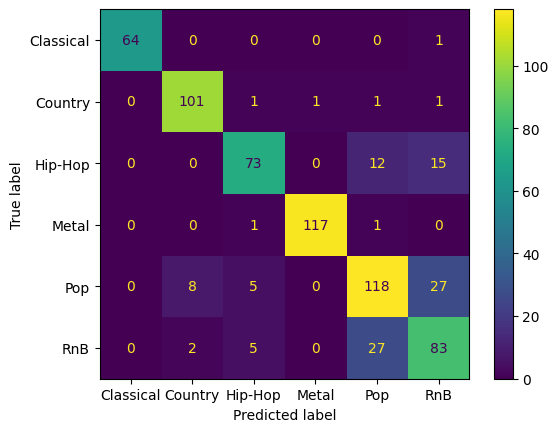

In [ ]:
labels = ['Classical', 'Country', 'Hip-Hop', 'Metal', 'Pop', 'RnB']
matrix = metrics.confusion_matrix(predictions, y_test, labels=final_forest.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot()

In [ ]:
print(metrics.classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

   Classical       0.98      1.00      0.99        64
     Country       0.96      0.91      0.94       111
     Hip-Hop       0.73      0.86      0.79        85
       Metal       0.98      0.99      0.99       118
         Pop       0.75      0.74      0.74       159
         RnB       0.71      0.65      0.68       127

    accuracy                           0.84       664
   macro avg       0.85      0.86      0.85       664
weighted avg       0.84      0.84      0.84       664



Concatenate predictions and actual labels to data

In [ ]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17a4cf4d-2885-4c39-8a41-18cbbdec5ed5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>